In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Append parent directory to system path
sys.path.append('..')
from src.model_utils import prepare_data

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# 1. Load the preprocessed fraud data
print("Loading preprocessed fraud data...")
fraud_data = pd.read_csv('../data/processed/fraud_data_final.csv')
print(f"Loaded data shape: {fraud_data.shape}")
# Display sample of the data
print("\nSample of preprocessed data:")
display(fraud_data.head())

Loading preprocessed fraud data...
Loaded data shape: (151112, 31)

Sample of preprocessed data:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,user_avg_purchase,user_std_purchase,user_max_purchase,user_min_purchase,user_time_range_days,tx_velocity,source_encoded,browser_encoded,sex_encoded,country_encoded
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,7.327584e+08,...,-0.160204,NaN,-0.160204,-0.160204,0.0,0.0,2,0,1,84
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,3.503114e+08,...,-1.142592,NaN,-1.142592,-1.142592,0.0,0.0,0,0,0,171
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,2.621474e+09,...,-1.197169,NaN,-1.197169,-1.197169,0.0,0.0,2,3,1,171
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,3.840542e+09,...,0.385567,NaN,0.385567,0.385567,0.0,0.0,2,4,1,181
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,4.155831e+08,...,0.112681,NaN,0.112681,0.112681,0.0,0.0,0,4,1,171


In [4]:
# 2. Check data info and missing values
print("\nDataset Info:")
fraud_data.info()

print("\nMissing values:")
display(fraud_data.isnull().sum().to_frame(name="Missing Values"))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               151112 non-null  int64  
 1   signup_time           151112 non-null  object 
 2   purchase_time         151112 non-null  object 
 3   purchase_value        151112 non-null  float64
 4   device_id             151112 non-null  object 
 5   source                151112 non-null  object 
 6   browser               151112 non-null  object 
 7   sex                   151112 non-null  object 
 8   age                   151112 non-null  float64
 9   ip_address            151112 non-null  float64
 10  class                 151112 non-null  int64  
 11  time_diff             151112 non-null  float64
 12  ip_string             151112 non-null  object 
 13  ip_int                151112 non-null  int64  
 14  country               129146 non-null

,Missing Values
user_id,0
signup_time,0
purchase_time,0
purchase_value,0
device_id,0
source,0
browser,0
sex,0
age,0
ip_address,0


In [5]:
# 3. Prepare data for modeling
print("\nPreparing data for modeling...")
X_train, X_test, y_train, y_test, feature_names = prepare_data(
    fraud_data,
    target_col='class',
    test_size=0.2,
    random_state=42
)

print("\nSample of X_train:")
display(X_train.head())


Preparing data for modeling...
Number of features selected: 22

Features to be used in model:
- user_id
- purchase_value
- age
- ip_address
- time_diff
- ip_int
- hour_of_day
- day_of_week
- is_weekend
- month
- time_since_signup
- user_tx_count
- user_avg_purchase
- user_std_purchase
- user_max_purchase
- user_min_purchase
- user_time_range_days
- tx_velocity
- source_encoded
- browser_encoded
- sex_encoded
- country_encoded

Data split summary:
Training set: 120889 samples
Test set: 30223 samples

Class distribution:
Training set:
class
0    0.906352
1    0.093648
Name: proportion, dtype: float64

Test set:
class
0    0.906363
1    0.093637
Name: proportion, dtype: float64

Sample of X_train:


,user_id,purchase_value,age,ip_address,time_diff,ip_int,hour_of_day,day_of_week,is_weekend,month,...,user_avg_purchase,user_std_purchase,user_max_purchase,user_min_purchase,user_time_range_days,tx_velocity,source_encoded,browser_encoded,sex_encoded,country_encoded
50481,306367,0.167258,0.331793,7.195639e+08,132.950833,719563902,5,3,0,7,...,0.167258,NaN,0.167258,0.167258,0.0,0.0,0,0,0,36
95673,349918,-0.651398,-0.248408,3.796264e+09,2474.670278,3796264016,16,1,0,6,...,-0.651398,NaN,-0.651398,-0.651398,0.0,0.0,1,2,1,181
139063,252150,0.549298,0.911994,4.106204e+09,2214.139444,4106203903,9,1,0,4,...,0.549298,NaN,0.549298,0.549298,0.0,0.0,0,2,1,181
28313,127539,2.677805,1.028034,6.139430e+08,852.813611,613943026,20,3,0,2,...,2.677805,NaN,2.677805,2.677805,0.0,0.0,1,1,1,36
123477,257348,0.167258,1.028034,1.763565e+08,210.768889,176356458,12,0,0,7,...,0.167258,NaN,0.167258,0.167258,0.0,0.0,2,4,1,181


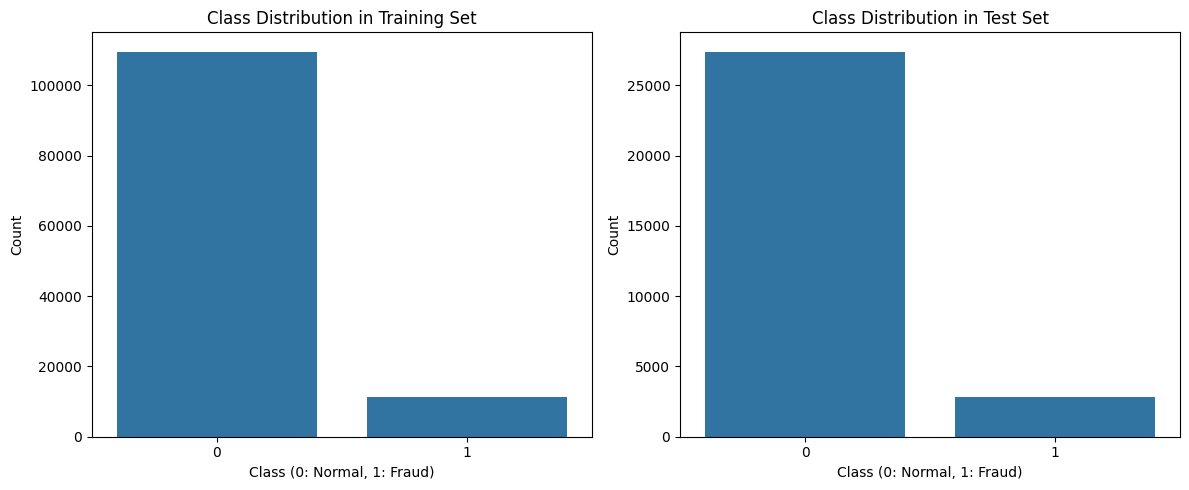

In [6]:
# 4. Visualize class distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Class Distribution in Test Set')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [7]:
# 5. Save the prepared datasets
print("\nSaving prepared datasets...")
train_data = pd.DataFrame(X_train, columns=feature_names)
train_data['class'] = y_train
test_data = pd.DataFrame(X_test, columns=feature_names)
test_data['class'] = y_test

train_data.to_csv('../data/processed/train_data.csv', index=False)
test_data.to_csv('../data/processed/test_data.csv', index=False)
print("Datasets saved to 'data/processed' directory")


Saving prepared datasets...
Datasets saved to 'data/processed' directory


In [8]:
# 6. Display feature correlation with target
correlation_with_target = train_data.corr()['class'].sort_values(ascending=False)
print("\nFeature correlation with target variable:")
display(correlation_with_target)


Feature correlation with target variable:


class                   1.000000
day_of_week             0.018644
is_weekend              0.014055
sex_encoded             0.006974
age                     0.005893
user_id                 0.001957
purchase_value          0.001289
user_max_purchase       0.001289
user_avg_purchase       0.001289
user_min_purchase       0.001289
country_encoded        -0.000822
hour_of_day            -0.000942
ip_address             -0.005198
ip_int                 -0.005198
source_encoded         -0.005228
browser_encoded        -0.011752
time_diff              -0.259748
time_since_signup      -0.259748
month                  -0.312849
user_tx_count                NaN
user_std_purchase            NaN
user_time_range_days         NaN
tx_velocity                  NaN
Name: class, dtype: float64

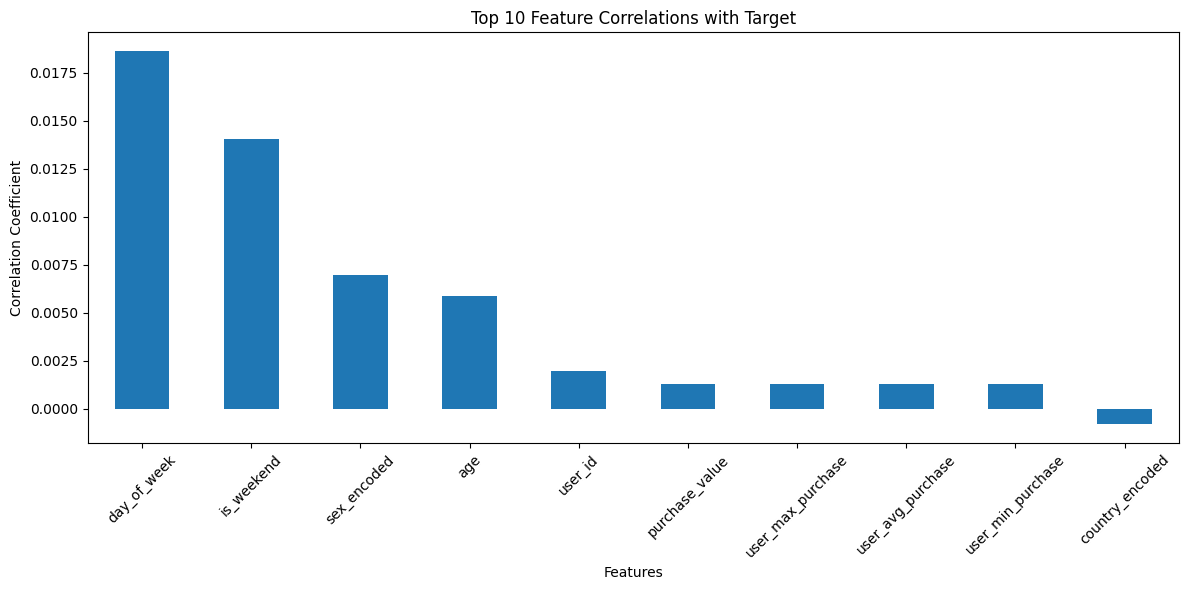

In [9]:
# Visualize top 10 feature correlations
plt.figure(figsize=(12, 6))
correlation_with_target[1:11].plot(kind='bar')
plt.title('Top 10 Feature Correlations with Target')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()